In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

print("Version of numpy:", np.__version__)
print("Version of matplotlib:", matplotlib.__version__)

Version of numpy: 1.23.3
Version of matplotlib: 3.5.3


In [2]:
# set random seed
np.random.seed(42)

In [3]:
# creating the input array
#X = np.array([[1, 0, 0, 0], [1, 0, 1, 1], [0, 1, 0, 1]])
#X = np.array([[10, 200, 2, 1000], [7, 178, 6, 1200], [4, 324, 8, 2000]])

#create data
df = pd.DataFrame([
                   [180000, 110, 18.9, 1400], 
                   [360000, 905, 23.4, 1800], 
                   [230000, 230, 14.0, 1300], 
                   [60000, 450, 13.5, 1500], 
                   [80000, 420, 10.5, 1000]],
    
                   columns=['Col A', 'Col B',
                            'Col C', 'Col D'])
display(df)
# Using The maximum absolute scaling
# copy the data
df_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

X = df_max_scaled.to_numpy()

print("Input:\n", X)

# shape of input array
print("\nShape of Input:", X.shape)

,Col A,Col B,Col C,Col D
0,180000,110,18.9,1400
1,360000,905,23.4,1800
2,230000,230,14.0,1300
3,60000,450,13.5,1500
4,80000,420,10.5,1000


,Col A,Col B,Col C,Col D
0,0.500000,0.121547,0.807692,0.777778
1,1.000000,1.000000,1.000000,1.000000
2,0.638889,0.254144,0.598291,0.722222
3,0.166667,0.497238,0.576923,0.833333
4,0.222222,0.464088,0.448718,0.555556


Input:
 [[0.5        0.12154696 0.80769231 0.77777778]
 [1.         1.         1.         1.        ]
 [0.63888889 0.25414365 0.5982906  0.72222222]
 [0.16666667 0.49723757 0.57692308 0.83333333]
 [0.22222222 0.4640884  0.44871795 0.55555556]]

Shape of Input: (5, 4)


In [4]:
# converting the input in matrix form
X = X.T
print("Input in matrix form:\n", X)

# shape of input matrix
print("\nShape of Input Matrix:", X.shape)

Input in matrix form:
 [[0.5        1.         0.63888889 0.16666667 0.22222222]
 [0.12154696 1.         0.25414365 0.49723757 0.4640884 ]
 [0.80769231 1.         0.5982906  0.57692308 0.44871795]
 [0.77777778 1.         0.72222222 0.83333333 0.55555556]]

Shape of Input Matrix: (4, 5)


In [5]:
# creating the output array
#y = np.array([[1], [1], [0]])
y = np.array([[9.12], [12.23], [14.08], [10.24], [11.56]])

print("Actual Output:\n", y)

# output in matrix form
y = y.T

print("\nOutput in matrix form:\n", y)

# shape of input array
print("\nShape of Output:", y.shape)

# explicit function to normalize array Min-max
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

# target in list
target = y[0].tolist()

normalized_array_1d = normalize(y[0],0,1)
print("Original Array = ", y[0])
print("Normalized Array = ", normalized_array_1d)

y = np.array([normalized_array_1d])

print("y final:", y)

print("target:", target)

Actual Output:
 [[ 9.12]
 [12.23]
 [14.08]
 [10.24]
 [11.56]]

Output in matrix form:
 [[ 9.12 12.23 14.08 10.24 11.56]]

Shape of Output: (1, 5)
Original Array =  [ 9.12 12.23 14.08 10.24 11.56]
Normalized Array =  [0.0, 0.6270161290322582, 1.0, 0.22580645161290339, 0.4919354838709679]
y final: [[0.         0.62701613 1.         0.22580645 0.49193548]]
target: [9.12, 12.23, 14.08, 10.24, 11.56]


## Defining The Network

In [6]:
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

## Initializing Weight

In [7]:
# Shape of weights_input_hidden should number of neurons at input layer * number of neurons at hidden layer
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))

# Shape of weights_hidden_output should number of neurons at hidden layer * number of neurons at output layer
weights_hidden_output = np.random.uniform(size=(hiddenLayer_neurons, outputLayer_neurons))

In [8]:
# shape of weight matrix
weights_input_hidden.shape, weights_hidden_output.shape

((4, 3), (3, 1))

In [9]:
# defining the Sigmoid Function
def sigmoid(x):
    #print("sigmoid:", x)
    return 1 / (1 + np.exp(-x))

In [10]:
# hidden layer activations

hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

In [11]:
# calculating the output
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output = sigmoid(outputLayer_linearTransform)

In [12]:
# output
output

array([[0.71094739, 0.74316088, 0.71322106, 0.70987181, 0.6998249 ]])

## Defining Loss Function

In [13]:
# calculating error
error = np.square(y - output) / 2
error

array([[0.2527231 , 0.0067448 , 0.04112108, 0.11715964, 0.021609  ]])

In [14]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

In [15]:
# rate of change of output w.r.t. Z2
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))

In [16]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

In [17]:
# checking the shapes of partial derivatives
error_wrt_output.shape, 
output_wrt_outputLayer_LinearTransform.shape, 
outputLayer_LinearTransform_wrt_weights_hidden_output.shape

(3, 5)

In [18]:
# shape of weights of output layer
weights_hidden_output.shape

(3, 1)

In [19]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_weights_hidden_output = np.dot(outputLayer_LinearTransform_wrt_weights_hidden_output,
                                         (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,)

In [20]:
error_wrt_weights_hidden_output.shape

(3, 1)

In [21]:
# rate of change of Z2 w.r.t. hidden layer activations
outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output

In [22]:
# rate of change of hidden layer activations w.r.t. Z1
hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
    hiddenLayer_activations, (1 - hiddenLayer_activations))

In [23]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
hiddenLayer_linearTransform_wrt_weights_input_hidden = X

In [24]:
# checking the shapes of partial derivatives
print(
    error_wrt_output.shape,
    output_wrt_outputLayer_LinearTransform.shape,
    outputLayer_LinearTransform_wrt_hiddenLayer_activations.shape,
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform.shape,
    hiddenLayer_linearTransform_wrt_weights_input_hidden.shape,
)

(1, 5) (1, 5) (3, 1) (3, 5) (4, 5)


In [25]:
# shape of weights of hidden layer
weights_input_hidden.shape

(4, 3)

In [26]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_weights_input_hidden = np.dot(
    hiddenLayer_linearTransform_wrt_weights_input_hidden,
    (
        hiddenLayer_activations_wrt_hiddenLayer_linearTransform
        * np.dot(
            outputLayer_LinearTransform_wrt_hiddenLayer_activations,
            (output_wrt_outputLayer_LinearTransform * error_wrt_output),
        )
    ).T,
)

In [27]:
error_wrt_weights_input_hidden.shape

(4, 3)

In [28]:
# defining the learning rate
lr = 0.01

In [29]:
# initial weights_hidden_output
weights_hidden_output

array([[0.83244264],
       [0.21233911],
       [0.18182497]])

In [30]:
# initial weights_input_hidden
weights_input_hidden

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985]])

In [31]:
# updating the weights of output layer
weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output

In [32]:
# updating the weights of hidden layer
weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

In [33]:
# updated weights_hidden_output
weights_hidden_output

array([[0.8306246 ],
       [0.21049935],
       [0.17977003]])

In [34]:
# updated weights_input_hidden
weights_input_hidden

array([[0.37440777, 0.95068393, 0.73197416],
       [0.59851111, 0.15598019, 0.15596923],
       [0.05778381, 0.86610438, 0.60106779],
       [0.7077421 , 0.02050312, 0.9698564 ]])

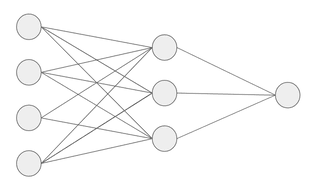

In [35]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set = 4
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(size=(hiddenLayer_neurons, outputLayer_neurons))

# defining the parameters
lr = 0.1 
epochs = 8000

print("inputLayer_neurons:", inputLayer_neurons)
print("X:", X.shape)

inputLayer_neurons: 4
X: (4, 5)


In [36]:
losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    #print("hiddenLayer_linearTransform", hiddenLayer_linearTransform)
    #print("type hiddenLayer_linearTransform", hiddenLayer_linearTransform.shape)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)
    #print("hiddenLayer_activations", hiddenLayer_activations)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    
    #print("outputLayer_linearTransform", outputLayer_linearTransform)
    #output = sigmoid(outputLayer_linearTransform)
    output2 = np.sum(outputLayer_linearTransform)
    output = outputLayer_linearTransform
    
    #print("Output: ", output)
    #print("Output2: ", output2)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2
    
    #print("ERROR :", error)

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 1000 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.11928
Error at epoch 1000 is 0.05462
Error at epoch 2000 is 0.04733
Error at epoch 3000 is 0.02702
Error at epoch 4000 is 0.01324
Error at epoch 5000 is 0.00771
Error at epoch 6000 is 0.00534
Error at epoch 7000 is 0.00408


In [37]:
# updated w_ih
weights_input_hidden 

array([[ 2.20466737,  0.79120168, -0.09054243],
       [ 0.24091514,  0.41604542,  0.3874282 ],
       [-2.76194991, -0.55734962,  1.11777497],
       [-0.08450993,  0.35772682,  0.15458333]])

In [38]:
# updated w_ho
weights_hidden_output 

array([[ 3.53789787],
       [ 0.51397507],
       [-1.40402532]])

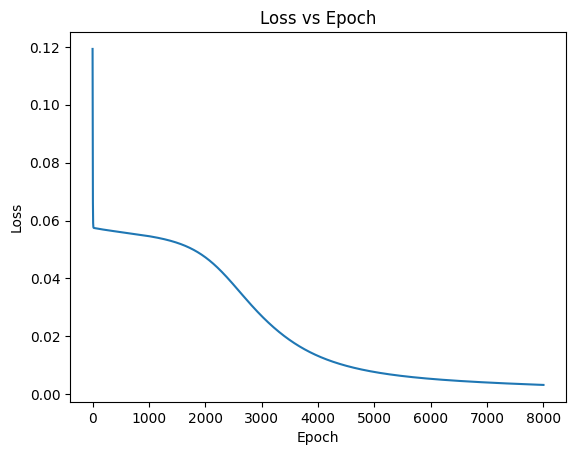

In [39]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses)) 
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [40]:
# final output from the model
output

y_p = output.T
print(y_p.shape)
print(y_p)

(5, 1)
[[0.09998988]
 [0.63349621]
 [0.90367836]
 [0.11808577]
 [0.53080961]]


In [41]:
# actual target
y

y_act = y.T
print(y_act)

[[0.        ]
 [0.62701613]
 [1.        ]
 [0.22580645]
 [0.49193548]]


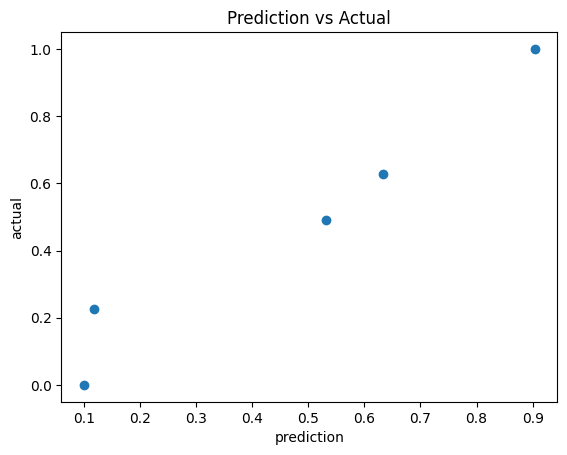

In [42]:
plt.scatter(y_p, y_act)
plt.title("Prediction vs Actual")
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

In [44]:
#plt.plot(y_p,forecast, c='red')
#plt.plot(y_act,train_z, c='green')

a = y_act.tolist()
b = y_p.tolist()
x = []
y = []
for val in a:
    x.append(val[0])

for val in b:
    y.append(val[0])

def reverse(X, xmin, xmax):
    rev = []
    for val in X:
        rev.append(val*(xmax - xmin) + xmin)
    return rev

act = reverse(x, 14.08, 9.12)
pred = reverse(y, 14.08, 9.12)
print("cek:", act)   
print("pred:", pred) 
    
print(a)
print("x:", x)
print("y:", y)
print(y_act.shape)

#display(df)

df['Actual'] = act
df['Prediction'] = pred

display(df)

cek: [14.08, 10.969999999999999, 9.12, 12.959999999999999, 11.639999999999999]
pred: [13.584050198513337, 10.937858776527124, 9.597755332236826, 13.494294597722162, 11.447184337984025]
[[0.0], [0.6270161290322582], [1.0], [0.22580645161290339], [0.4919354838709679]]
x: [0.0, 0.6270161290322582, 1.0, 0.22580645161290339, 0.4919354838709679]
y: [0.09998987933198852, 0.633496214409854, 0.9036783604361239, 0.11808576658827387, 0.5308096092774144]
(5, 1)


,Col A,Col B,Col C,Col D,Actual,Prediction
0,180000,110,18.9,1400,14.08,13.584050
1,360000,905,23.4,1800,10.97,10.937859
2,230000,230,14.0,1300,9.12,9.597755
3,60000,450,13.5,1500,12.96,13.494295
4,80000,420,10.5,1000,11.64,11.447184


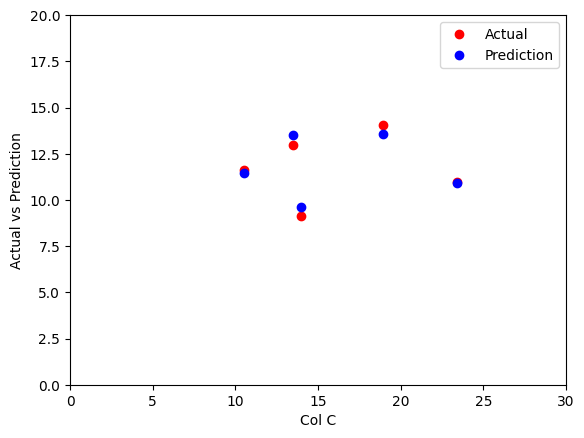

In [58]:
# plt.plot([,'g*', y, 'ro'])
# plt.show()

df.plot(x='Col C', y=['Actual', 'Prediction'], style='o', color=['red','blue'])
plt.xlabel("Col C")
plt.ylabel("Actual vs Prediction")
plt.xlim(0, 30)
plt.ylim(0, 20)
plt.show()



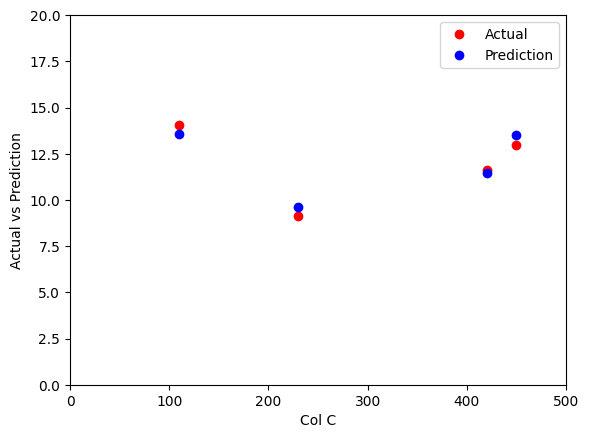

In [61]:
df.plot(x='Col B', y=['Actual', 'Prediction'], style='o', color=['red','blue'])
plt.xlabel("Col C")
plt.ylabel("Actual vs Prediction")
plt.xlim(0, 500)
plt.ylim(0, 20)
plt.show()


In [ ]:
# losses = []
# for epoch in range(epochs):
#     ## Forward Propogation

#     # calculating hidden layer activations
#     hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
#     hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

#     # calculating the output
#     outputLayer_linearTransform = np.dot(
#         weights_hidden_output.T, hiddenLayer_activations
#     )
#     output = sigmoid(outputLayer_linearTransform)

#     ## Backward Propagation

#     # calculating error
#     error = np.square(y - output) / 2

#     # calculating rate of change of error w.r.t weight between hidden and output layer
#     error_wrt_output = -(y - output)
#     output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
#     outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

#     error_wrt_weights_hidden_output = np.dot(
#         outputLayer_LinearTransform_wrt_weights_hidden_output,
#         (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
#     )

#     # calculating rate of change of error w.r.t weights between input and hidden layer
#     outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
#     hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
#         hiddenLayer_activations, (1 - hiddenLayer_activations)
#     )
#     hiddenLayer_linearTransform_wrt_weights_input_hidden = X
#     error_wrt_weights_input_hidden = np.dot(
#         hiddenLayer_linearTransform_wrt_weights_input_hidden,
#         (
#             hiddenLayer_activations_wrt_hiddenLayer_linearTransform
#             * np.dot(
#                 outputLayer_LinearTransform_wrt_hiddenLayer_activations,
#                 (output_wrt_outputLayer_LinearTransform * error_wrt_output),
#             )
#         ).T,
#     )

#     # updating the weights
#     weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
#     weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

#     # print error at every 100th epoch
#     epoch_loss = np.average(error)
#     if epoch % 1000 == 0:
#         print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

#     # appending the error of each epoch
#     losses.append(epoch_loss)